## Feature engineering

* `Feature engineering` is the process of transforming raw data into a format that is suitable for machine learning models.
* It involves creating new features or modifying existing ones to improve the performance of `predictive models`.
* Effective feature engineering can significantly impact the accuracy, interpretability, and efficiency of machine learning algorithms.

<img src="images/machine_learning_four_data_types.webp"/>

**Example: Concrete Compressive Strength**

* Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete.
* These components can affect the compressive strength of the concrete.
* To obtain the real compressive strength of concrete (target labels in the dataset), an engineer needs to break the cylinder samples under the compression-testing machine.
* The failure load is divided by the cylinder's cross-section to obtain the compressive strength.
* Engineers use different kinds of concretes for different building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi (17.2 MPa).
* Concrete is a material with high strength in compression, but low strength in tension. That is why engineers use reinforced concrete (usually with steel rebars) to build structures.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 96.5/96.5 kB 2.7 MB/s eta 0:00:00


In [7]:
df = pd.read_excel("Dataset/Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
df.columns = ['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','CompressiveStrength']
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


* You can see here the various ingredients going into each variety of concrete.
* We'll see in a moment how adding some additional synthetic features derived from these can help a model to learn important relationships among them.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<Axes: xlabel='CompressiveStrength'>

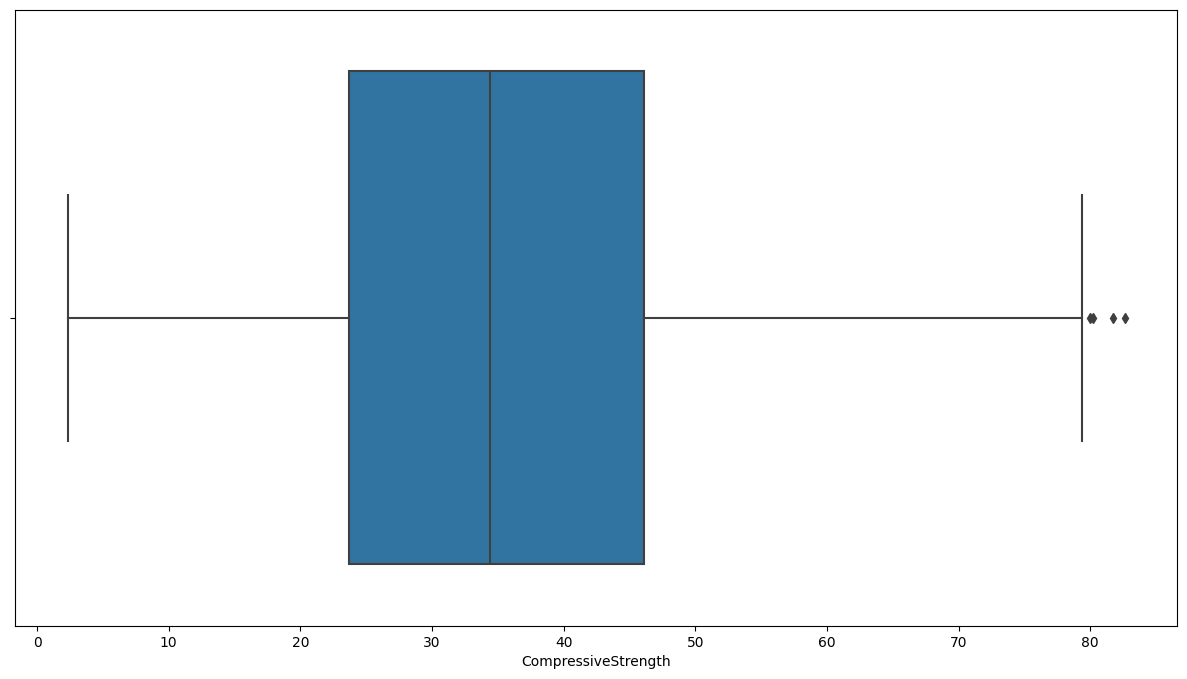

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(df,x='CompressiveStrength')

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


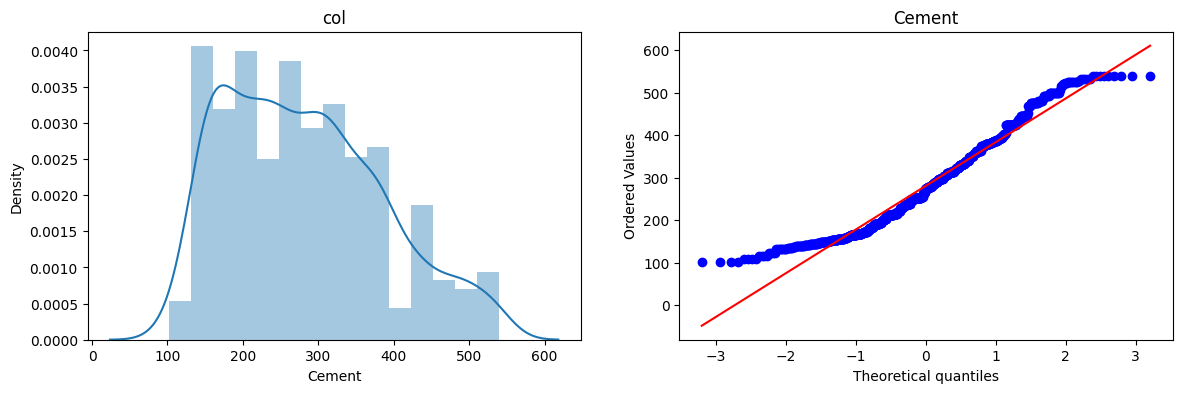

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


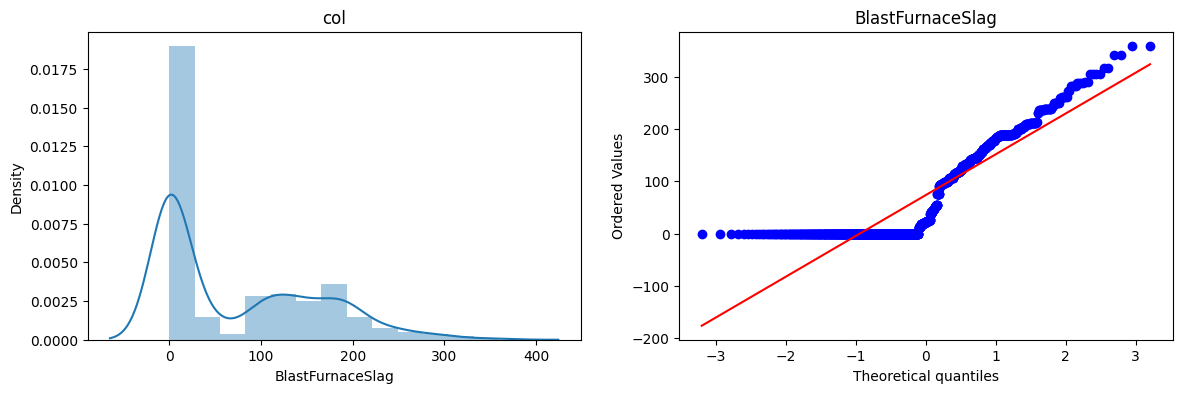

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


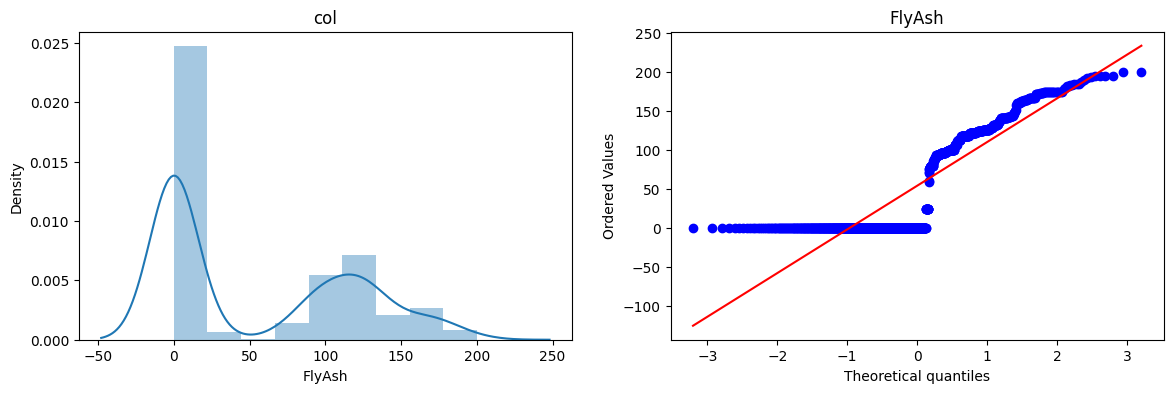

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


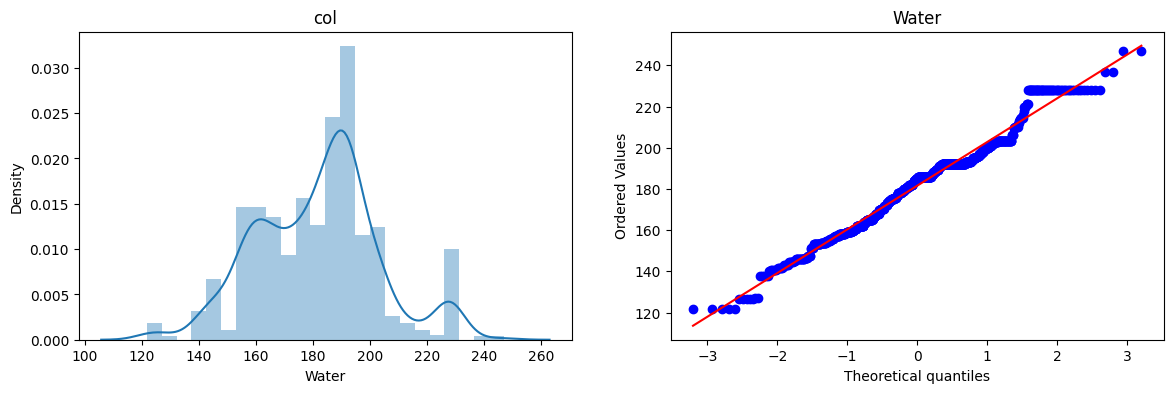

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


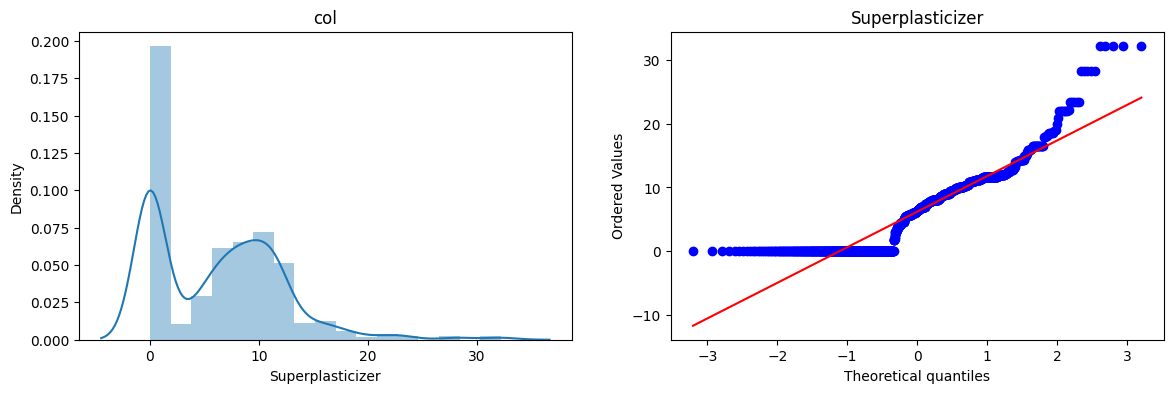

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


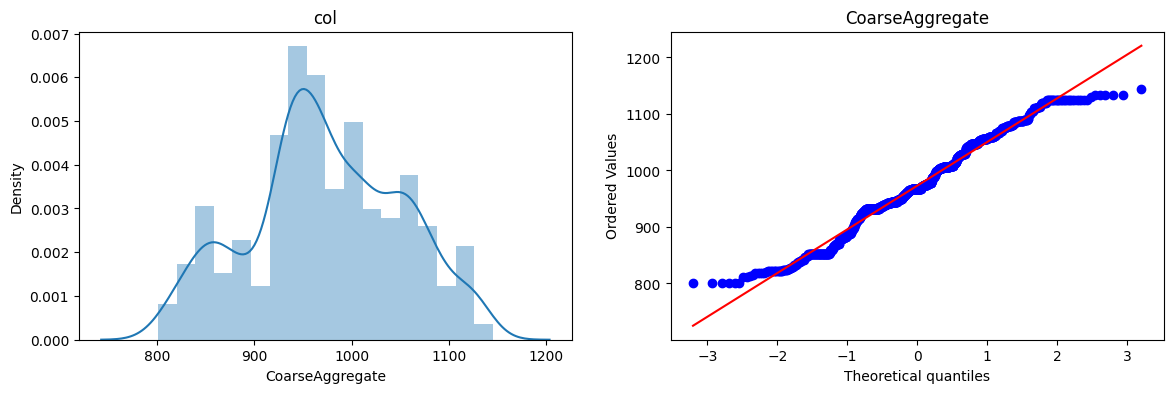

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


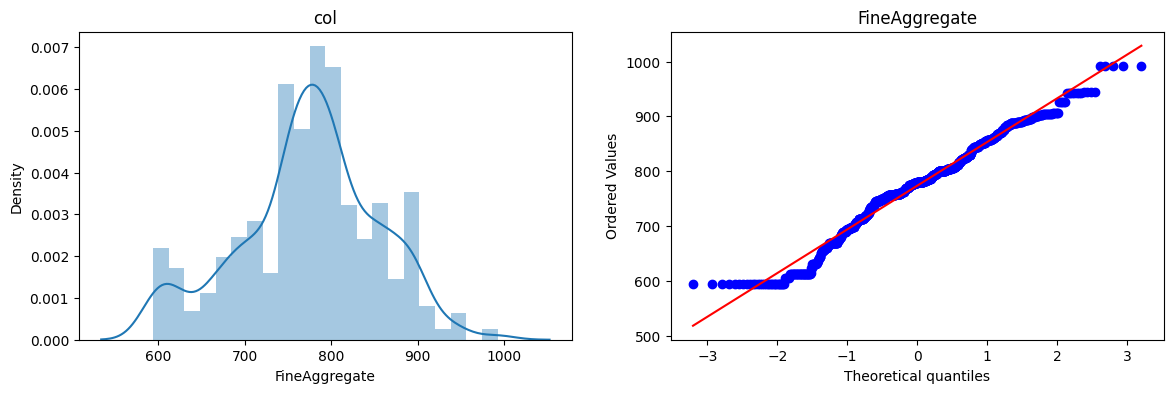

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


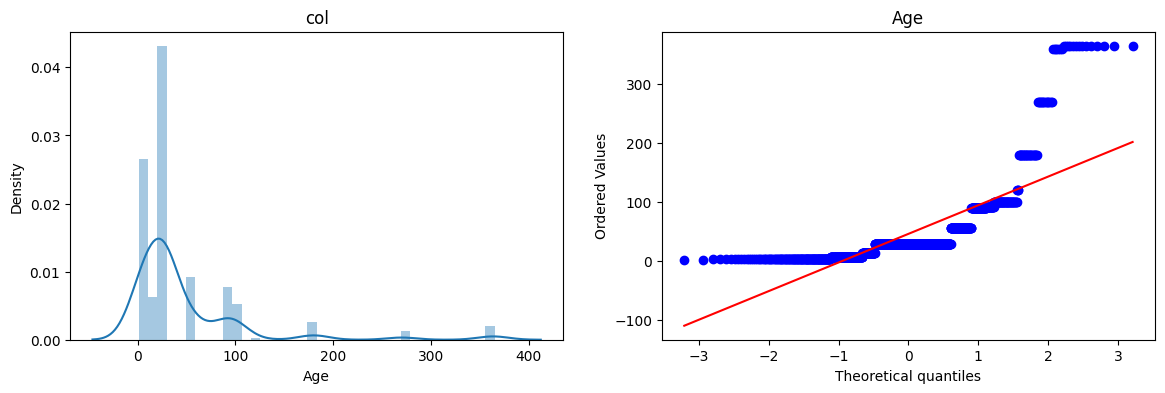

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_11676\11759126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


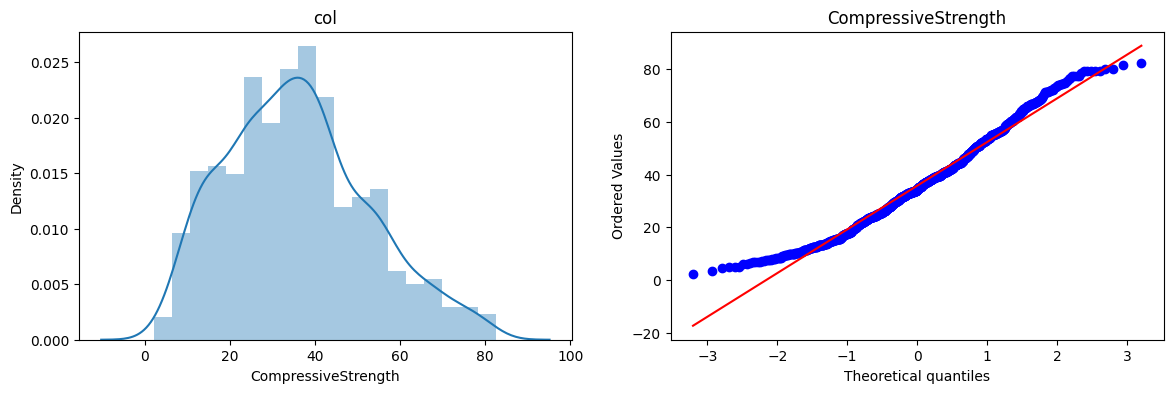

In [16]:
import scipy.stats as stats
for col in df.columns:
    plt.figure(figsize= (14, 4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title('col')
    
    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)
    
    plt.show()

1. `One-Hot Encoding:` One-hot encoding is a widely used technique where each category in a categorical variable is transformed into a binary feature. Each feature represents whether a particular category is present (1) or absent (0) in the original variable. This technique expands the feature space but allows algorithms to effectively utilize categorical information.

2‍. `Label Encoding:` Label encoding assigns a unique numerical label to each category in a categorical variable. It replaces the original categories with their corresponding numerical labels. 

3‍. `Ordinal Encoding:` Ordinal encoding is similar to label encoding but preserves the order of the categories. It assigns numerical labels to categories based on their order or some predefined mapping. Ordinal encoding is suitable when the categories have a natural order, such as "low," "medium," and "high."

4‍. `Frequency Encoding:` Frequency encoding replaces categories with their corresponding frequencies in the dataset. It assigns a numerical value to each category based on how frequently it appears. This technique captures the distribution of categories and can be useful when the frequency of occurrence is informative.

5‍. `Target Encoding:` Target encoding incorporates the target variable's information into the categorical encoding process. Each category is encoded with the statistical summary (e.g., mean, median, etc.) of the target variable for that category. Target encoding can be effective in capturing the relationship between categorical variables and the target but may be prone to overfitting.